In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

"""
vehicle_id STRING 车辆唯一标志码
time INT 时间
state INT 车辆状态（1 代表启动，2 代表熄火，3 代表其他）
GPS_lat FLOAT 纬度
GPS_lon FLOAT 经度
"""

data = pd.read_csv('./track_data.csv')
data.head()

,time,state,GPS_lon,GPS_lat,vehicle_id
0,20171001000010,NaN,117.106695,40.159000,4
1,20171001000020,NaN,117.106703,40.158992,4
2,20171001000030,NaN,117.106713,40.158985,4
3,20171001000040,NaN,117.106736,40.158991,4
4,20171001000050,NaN,117.106737,40.158998,4


In [2]:
# 筛选时间
"""
v1:20180505003414~20180520172231
v2:20180103003659~20180416091822
v3:20171023235404~20171204015011
v4:20171021174303~20171122161235
"""

#v1 = data[(data.vehicle_id == 1) & (data.time >= 20180505003414) & (data.time <= 20180520172231)].copy()
#v2 = data[(data.vehicle_id == 2) & (data.time >= 20180103003659) & (data.time <= 20180416091822)].copy()
#v3 = data[(data.vehicle_id == 3) & (data.time >= 20171023235404) & (data.time <= 20171204015011)].copy()
#v4 = data[(data.vehicle_id == 4) & (data.time >= 20171021174303) & (data.time <= 20171122161235)].copy()
v1=data[(data.vehicle_id==1)]
v2=data[(data.vehicle_id==2)]
v3=data[(data.vehicle_id==3)]
v4=data[(data.vehicle_id==4)]
len(data), len(v1) + len(v2) + len(v3) + len(v4), len(v1), len(v2), len(v3), len(v4)

(2019381, 2019381, 147029, 733945, 422797, 715610)

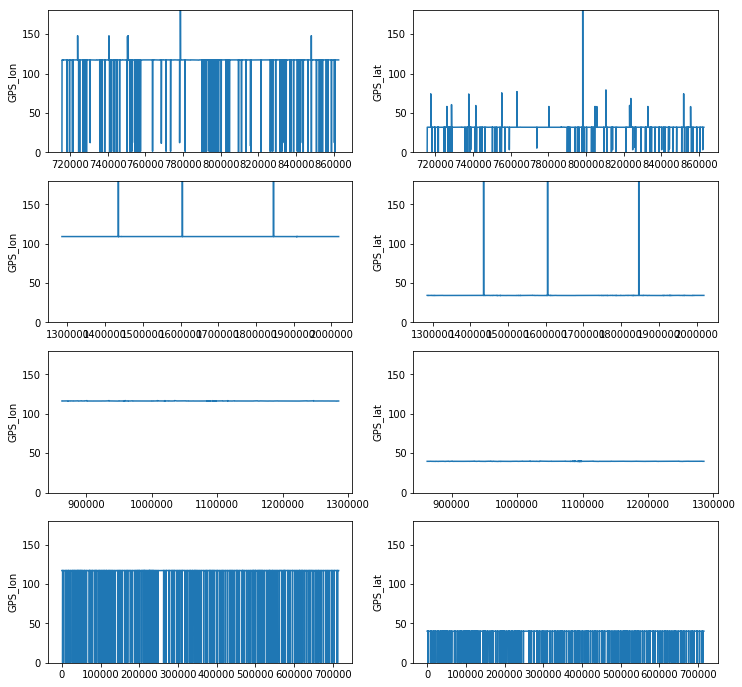

In [3]:
plt.figure(figsize = (12, 12))

for i, v in enumerate([v1, v2, v3, v4]):
    plt.subplot(4, 2, i*2+1)
    plt.plot(v.index, v['GPS_lon'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lon')

    plt.subplot(4, 2, i*2+2)
    plt.plot(v.index, v['GPS_lat'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lat')

In [19]:
# 筛选经纬
"""
v1: lon (116,118) lat (31,32)
v2: lon (108,110) lat (34,35)
v3: lon (116,117) lat (39,41)
v4: lon (116,118) lat (40,41)
"""

v1.loc[(v1.GPS_lon < 116) | (v1.GPS_lon > 118), 'GPS_lon'] = np.nan
v1.loc[(v1.GPS_lat < 31) | (v1.GPS_lat > 33), 'GPS_lat'] = np.nan

v2.loc[(v2.GPS_lon < 108) | (v2.GPS_lon > 110), 'GPS_lon'] = np.nan
v2.loc[(v2.GPS_lat < 34) | (v2.GPS_lat > 35), 'GPS_lat'] = np.nan

v3.loc[(v3.GPS_lon < 116) | (v3.GPS_lon > 117), 'GPS_lon'] = np.nan
v3.loc[(v3.GPS_lat < 39) | (v3.GPS_lat > 41), 'GPS_lat'] = np.nan

v4.loc[(v4.GPS_lon < 116) | (v4.GPS_lon > 118), 'GPS_lon'] = np.nan
v4.loc[(v4.GPS_lat < 40) | (v4.GPS_lat > 41), 'GPS_lat'] = np.nan

#v1.loc[(v1.GPS_lon < 116-1) | (v1.GPS_lon > 118+1), 'GPS_lon'] = np.nan
#v1.loc[(v1.GPS_lat < 30) | (v1.GPS_lat > 34), 'GPS_lat'] = np.nan

#v2.loc[(v2.GPS_lon < 108-1) | (v2.GPS_lon > 110+1), 'GPS_lon'] = np.nan
#v2.loc[(v2.GPS_lat < 34-1) | (v2.GPS_lat > 35+1), 'GPS_lat'] = np.nan

#v3.loc[(v3.GPS_lon < 116-1) | (v3.GPS_lon > 117+1), 'GPS_lon'] = np.nan
#v3.loc[(v3.GPS_lat < 39-1) | (v3.GPS_lat > 41+1), 'GPS_lat'] = np.nan

#v4.loc[(v4.GPS_lon < 116-1) | (v4.GPS_lon > 118+1), 'GPS_lon'] = np.nan
#v4.loc[(v4.GPS_lat < 40-1) | (v4.GPS_lat > 41+1), 'GPS_lat'] = np.nan




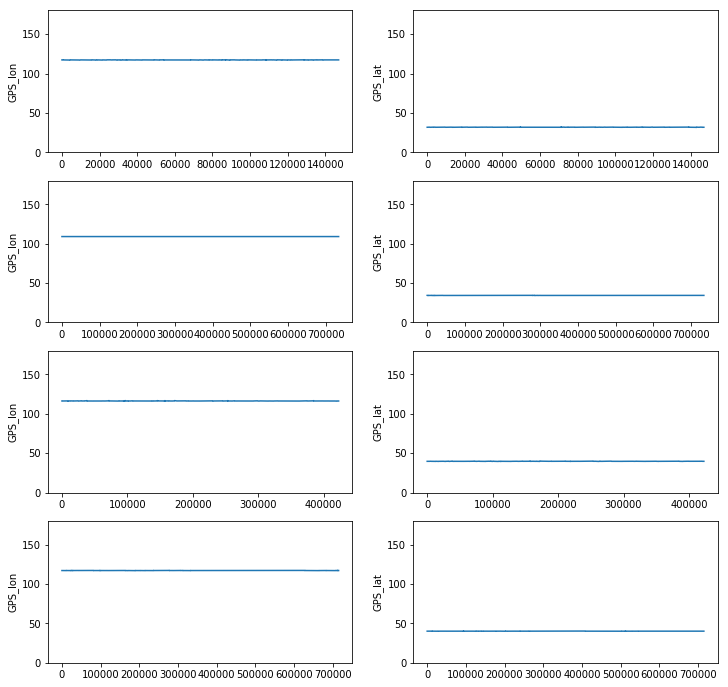

In [20]:
plt.figure(figsize = (12, 12))

for i, v in enumerate([v1, v2, v3, v4]):
    plt.subplot(4, 2, i*2+1)
    plt.plot(v.index, v['GPS_lon'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lon')

    plt.subplot(4, 2, i*2+2)
    plt.plot(v.index, v['GPS_lat'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lat')

In [21]:
# 插值填充
v1['GPS_lon'] = v1['GPS_lon'].interpolate()
v1['GPS_lat'] = v1['GPS_lat'].interpolate()

v2['GPS_lon'] = v2['GPS_lon'].interpolate()
v2['GPS_lat'] = v2['GPS_lat'].interpolate()

v3['GPS_lon'] = v3['GPS_lon'].interpolate()
v3['GPS_lat'] = v3['GPS_lat'].interpolate()

v4['GPS_lon'] = v4['GPS_lon'].interpolate()
v4['GPS_lat'] = v4['GPS_lat'].interpolate()

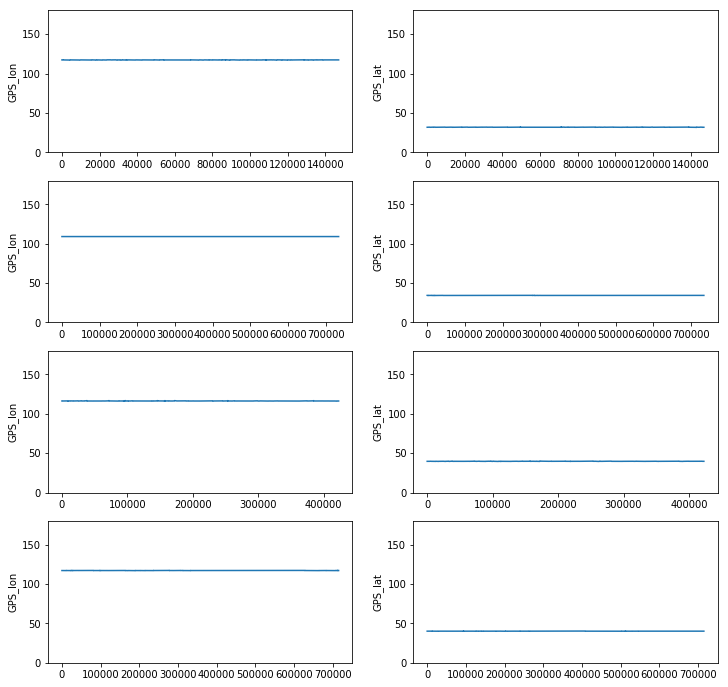

In [22]:
plt.figure(figsize = (12, 12))

for i, v in enumerate([v1, v2, v3, v4]):
    plt.subplot(4, 2, i*2+1)
    plt.plot(v.index, v['GPS_lon'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lon')

    plt.subplot(4, 2, i*2+2)
    plt.plot(v.index, v['GPS_lat'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lat')

# 轨迹计算

In [23]:
v1_2=v1[1:]
v2_2=v2[1:]
v3_2=v3[1:]
v4_2=v4[1:]
v1=v1[:-1].reset_index(drop=True)
v2=v2[:-1].reset_index(drop=True)
v3=v3[:-1].reset_index(drop=True)
v4=v4[:-1].reset_index(drop=True)
v1

,time,state,GPS_lon,GPS_lat,vehicle_id
0,20180501055520,2.0,NaN,NaN,1
1,20180501055550,2.0,117.267320,31.767820,1
2,20180501055620,2.0,117.267336,31.767808,1
3,20180501055650,2.0,117.267296,31.767862,1
4,20180501055720,2.0,117.267288,31.767878,1
5,20180501055750,2.0,117.267296,31.767902,1
6,20180501055820,2.0,117.267280,31.767920,1
7,20180501055850,2.0,117.267256,31.767938,1
8,20180501055920,2.0,117.267264,31.767942,1
9,20180501055950,2.0,117.267240,31.767922,1


In [24]:
Bw1=v1_2["GPS_lat"]
Bj1=v1_2["GPS_lon"]
Aw1=v1["GPS_lat"]
Aj1=v1["GPS_lon"]
Bw1=Bw1.reset_index(drop = True)
Bj1=Bj1.reset_index(drop=True)
Aw1=Aw1.reset_index(drop=True)
Aj1=Aj1.reset_index(drop=True)

Bw2=v2_2["GPS_lat"]
Bj2=v2_2["GPS_lon"]
Aw2=v2["GPS_lat"]
Aj2=v2["GPS_lon"]
Bw2=Bw2.reset_index(drop = True)
Bj2=Bj2.reset_index(drop=True)
Aw2=Aw2.reset_index(drop=True)
Aj2=Aj2.reset_index(drop=True)

Bw3=v3_2["GPS_lat"]
Bj3=v3_2["GPS_lon"]
Aw3=v3["GPS_lat"]
Aj3=v3["GPS_lon"]
Bw3=Bw3.reset_index(drop = True)
Bj3=Bj3.reset_index(drop=True)
Aw3=Aw3.reset_index(drop=True)
Aj3=Aj3.reset_index(drop=True)

Bw4=v4_2["GPS_lat"]
Bj4=v4_2["GPS_lon"]
Aw4=v4["GPS_lat"]
Aj4=v4["GPS_lon"]
Bw4=Bw4.reset_index(drop = True)
Bj4=Bj4.reset_index(drop=True)
Aw4=Aw4.reset_index(drop=True)
Aj4=Aj4.reset_index(drop=True)
#cosc=np.cos(np.pi/2-Bw)*np.cos(np.pi/2-Aw)+np.sin(np.pi/2-Bw)*np.sin(np.pi/2-Aw)*np.cos(Bj-Aj)
#cosc

"""""""""""
import math
a = Bw - Aw;#两点纬度之差
b = Bj - Aj #经度之差
s = 2 * math.asin(math.sqrt(math.pow(math.sin(a / 2), 2) + math.cos(Lat1) * math.cos(Lat2) * math.pow(Math.sin(b / 2), 2)));#计算两点距离的公式
s = s * 6378137.0;#弧长乘地球半径（半径为米）
s = math.round(s * 10000.0) / 10000.0;#精确距离的数值
""""""""""""""""""


第一步：计算三个参数:

    经度差值dx=x2-x2

    纬度差值dy=y2-y1

    平均纬度 b =(y1+y2)*0.5

第二步，计算东西方向距离和南北方向距离(单位：米)

 东西距离采用三阶多项式，南北采用一阶多项式即可

东西距离Lx = (0.05 * b*b*b - 19.16 * b*b + 47.13 * b + 110966 ) * dx

南北距离Ly = (17 * b + 110352) * dy

 

    第三步，用平面的方长形对角距离公式计算总距离：

      总距离 = sqrt ( Lx * Lx + Ly * Ly)


In [25]:
#代码
dx1=Bj1-Aj1
dy1=Bw1-Aw1
b1=(Bw1+Aw1)*0.5
Lx1 = (0.05 * b1*b1*b1 - 19.16 * b1*b1 + 47.13 * b1 + 110966 ) * dx1
Ly1 = (17 * b1 + 110352) * dy1
result1=np.sqrt ( Lx1 * Lx1 + Ly1 * Ly1)
Sum1=result1.sum()

dx2=Bj2-Aj2
dy2=Bw2-Aw2
b2=(Bw2+Aw2)*0.5
Lx2 = (0.05 * b2*b2*b2 - 19.16 * b2*b2 + 47.13 * b2 + 110966 ) * dx2
Ly2 = (17 * b2 + 110352) * dy2
result2=np.sqrt ( Lx2 * Lx2 + Ly2 * Ly2)
Sum2=result2.sum()

dx3=Bj3-Aj3
dy3=Bw3-Aw3
b3=(Bw3+Aw3)*0.5
Lx3 = (0.05 * b3*b3*b3 - 19.16 * b3*b3 + 47.13 * b3 + 110966 ) * dx3
Ly3 = (17 * b3 + 110352) * dy3
result3=np.sqrt ( Lx3 * Lx3 + Ly3 * Ly3)
Sum3=result3.sum()

dx4=Bj4-Aj4
dy4=Bw4-Aw4
b4=(Bw4+Aw4)*0.5
Lx4 = (0.05 * b4*b4*b4 - 19.16 * b4*b4 + 47.13 * b4 + 110966 ) * dx4
Ly4 = (17 * b4 + 110352) * dy4
result4=np.sqrt ( Lx4 * Lx4 + Ly4 * Ly4)
Sum4=result4.sum()

In [26]:
Sum1*0.001#/0.930806625

18169.443772003568

In [27]:
Sum2*0.001#/0.930806625

35299.766846206236

In [28]:
Sum3*0.001#/0.930806625

18240.313539657847

In [29]:
Sum4*0.001#/0.930806625

19299.497256417908

![title](../pdf/1.png)